<a href="https://colab.research.google.com/github/maronga/Team-4-Week-4-Core/blob/main/Analysis_of_Tourism_Activities_in_Tanzania.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TOURISM ACTIVITIES IN TANZANIA**

**Defining the Question** 
     
In Tanzania, the tourism sector is second in ranking in contributing to the national income. However, during the times of COVID, the industry took a huge blow due to travel restrictions. Now as countries are opening up, Tanzania should expect tourists to come back. The aim of this study is to give insight on the main tourism activity in Tanzania to invest more resources in.


**Defining the Metric of Success**

Successfully performing Exploratory Data Analysis, Univariate, Bivariate Analysis,Create Visualizations Testing a Hypothesis and Challenging the solution.

**Understanding the Context**


Tanzania’s tourism sector generated USD 1 billion in revenues in 2020 versus 2.6 billion in 2019, being severely affected by the Covid-19 pandemic and its impact on international travel. The sector’s contribution to GDP fell from 107% in 2019 to 5.3% in 2020. International tourist arrivals reached 620,900 in 2020, less than half the 1.5 million arrivals in 2019, the 1.4 million in 2018, and the 1.3 million in 2017.

**Recording the Experimental Design**


Below are the steps we took to implement this solution


1.   Business Understanding:This sheds light to the context of the research question we are trying to answer ensures we keep the focus during the data analysis so that we meet the intended objectives
2.   Reading the data: Read the data with the aim to understand the content in our dataset
3. Checking our data: We perfomed this step so that we could get details about our dataset like number of rows and columns and null values
4. Data cleaning: We performed the data cleaning and preparation to make our data ready for analysis
5. Challenged the solution

**Data Relevance**


The source of our data is [Zindi](https://zindi.africa/competitions/tanzania-tourism-prediction/data)

The surveys were
conducted recently, hence the data is current and has individual demograpgics that will
support us in assessing factors that drive financial inclusion.

## 1. Importing our libraries

In [ ]:
# Import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import math

## 2. Reading the Dataset from our CSV file

In [ ]:
# Load our dataset and view the first five columns
tourism = pd.read_csv('Tourism.csv')
tourism.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,13,0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,No,No,No,No,No,No,14,7,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,1,31,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,Yes,Yes,Yes,Yes,Yes,No,11,0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,Jan-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,No,No,No,No,No,No,7,4,Cash,Yes,No comments,1657500.0


In [ ]:
# Let's view the last five columns
tourism.tail()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
4804,tour_993,UAE,45-64,Alone,0.0,1.0,Business,Hunting tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,2,0,Credit Card,No,No comments,3315000.0
4805,tour_994,UNITED STATES OF AMERICA,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,Yes,11,0,Cash,Yes,Friendly People,10690875.0
4806,tour_995,NETHERLANDS,Jan-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,others,Independent,No,No,No,No,No,No,No,3,7,Cash,Yes,Good service,2246636.7
4807,tour_997,SOUTH AFRICA,25-44,Friends/Relatives,1.0,1.0,Business,Beach tourism,"Travel, agent, tour operator",Independent,Yes,Yes,Yes,No,No,No,No,5,0,Credit Card,No,Friendly People,1160250.0
4808,tour_999,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,No,4,7,Cash,Yes,Friendly People,13260000.0


In [ ]:
# Check the number of rows and columns in our dataframe
tourism.shape

(4809, 23)

**There are 4,809 records and 23 variables**

In [ ]:
# Our dataframe information
tourism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [ ]:
# The total number of missing values in our dataframe
tourism.isnull().sum().sum()

1435

**There is a total of 1435 null values in the dataset**

In [ ]:
# Identify any missing values
tourism.isnull().sum()

ID                          0
country                     0
age_group                   0
travel_with              1114
total_female                3
total_male                  5
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
dtype: int64

**The null values are in the travel with, total female, total male, and most impressing columns.**

In [ ]:
# Check for duplicate values
tourism.duplicated().sum()

0

**There are no duplicate values.**

In [ ]:
# Check the statistical information of our dataframe
tourism.describe()

,total_female,total_male,night_mainland,night_zanzibar,total_cost
count,4806.000000,4804.000000,4809.000000,4809.000000,4.809000e+03
mean,0.926758,1.009575,8.488043,2.304429,8.114389e+06
std,1.288242,1.138865,10.427624,4.227080,1.222490e+07
min,0.000000,0.000000,0.000000,0.000000,4.900000e+04
25%,0.000000,1.000000,3.000000,0.000000,8.121750e+05
50%,1.000000,1.000000,6.000000,0.000000,3.397875e+06
75%,1.000000,1.000000,11.000000,4.000000,9.945000e+06
max,49.000000,44.000000,145.000000,61.000000,9.953288e+07


**Above is a brief description of the dataset**

In [ ]:
# Let's identify the column names in our dataset
tourism.columns

Index(['ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'payment_mode', 'first_trip_tz', 'most_impressing',
       'total_cost'],
      dtype='object')

**The above are the 23 variables in our dataset**


## 3. Data Cleaning

In [ ]:
# Handling Missing Values
tourism.isnull().sum()

ID                          0
country                     0
age_group                   0
travel_with              1114
total_female                3
total_male                  5
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
dtype: int64

**There are null values that need to be dealth with.**

In [ ]:
# We will fill missing values in the travel_with column with DNS this stands for did not submit
tourism['travel_with'].fillna('DNS', inplace = True)
# View the changes
tourism['travel_with'].unique()

array(['Friends/Relatives', 'DNS', 'Alone', 'Spouse', 'Children',
       'Spouse and Children'], dtype=object)

**We will fill the nulls in the column (travel with) with DNS which denotes did not say. We are assuming that those with null in that particular variable did not say who they are travelling with.**

In [ ]:
# We will fill missing values in total female and total male with 0
tourism['total_female'].fillna(0.0, inplace = True)
tourism['total_male'].fillna(0.0, inplace = True)

**We fill the nulls from the total female and total male columns with 0. We do so assuming that those who did not fill they didn't have a male or female with them.**

In [ ]:
# Drop columns that we will not use in our analysis
tourism.drop(['most_impressing','info_source'],axis=1, inplace=True)
# Confirm changes
tourism.head(2)

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,Independent,No,No,No,No,No,No,No,13,0,Cash,No,674602.5
1,tour_10,UNITED KINGDOM,25-44,DNS,1.0,0.0,Leisure and Holidays,Cultural tourism,Independent,No,No,No,No,No,No,No,14,7,Cash,Yes,3214906.5


**We drop columns that are not relevant to our study.**

In [ ]:
# Final check for null values
tourism.isnull().sum()

ID                       0
country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
payment_mode             0
first_trip_tz            0
total_cost               0
dtype: int64

**We have cleared our data of null values**

*  We chose to replace the missing values in travel with with DNS, we assumed that 
respondents chose not to give an answer.

*  We chose to replace the null values in total male and total female with 0 because we assumed that they were not filled because they were not there.

In [ ]:
# Duplicates
tourism.duplicated().sum()

0

**We have no duplicate values**

In [ ]:
# Check for any anomalies
col = ['ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'tour_arrangement',
       'package_transport_int', 'package_accomodation', 'package_food',
       'package_transport_tz', 'package_sightseeing', 'package_guided_tour',
       'package_insurance', 'night_mainland', 'night_zanzibar', 'payment_mode',
       'first_trip_tz', 'total_cost']
for i in col:
  u = tourism[i].unique()
  print('Unique values of ', i , 'is' , u)

Unique values of  ID is ['tour_0' 'tour_10' 'tour_1000' ... 'tour_995' 'tour_997' 'tour_999']
Unique values of  country is ['SWIZERLAND' 'UNITED KINGDOM' 'CHINA' 'SOUTH AFRICA'
 'UNITED STATES OF AMERICA' 'NIGERIA' 'INDIA' 'BRAZIL' 'CANADA' 'MALT'
 'MOZAMBIQUE' 'RWANDA' 'AUSTRIA' 'MYANMAR' 'GERMANY' 'KENYA' 'ALGERIA'
 'IRELAND' 'DENMARK' 'SPAIN' 'FRANCE' 'ITALY' 'EGYPT' 'QATAR' 'MALAWI'
 'JAPAN' 'SWEDEN' 'NETHERLANDS' 'UAE' 'UGANDA' 'AUSTRALIA' 'YEMEN'
 'NEW ZEALAND' 'BELGIUM' 'NORWAY' 'ZIMBABWE' 'ZAMBIA' 'CONGO' 'BURGARIA'
 'PAKISTAN' 'GREECE' 'MAURITIUS' 'DRC' 'OMAN' 'PORTUGAL' 'KOREA'
 'SWAZILAND' 'TUNISIA' 'KUWAIT' 'DOMINICA' 'ISRAEL' 'FINLAND'
 'CZECH REPUBLIC' 'UKRAIN' 'ETHIOPIA' 'BURUNDI' 'SCOTLAND' 'RUSSIA'
 'GHANA' 'NIGER' 'MALAYSIA' 'COLOMBIA' 'LUXEMBOURG' 'NEPAL' 'POLAND'
 'SINGAPORE' 'LITHUANIA' 'HUNGARY' 'INDONESIA' 'TURKEY' 'TRINIDAD TOBACCO'
 'IRAQ' 'SLOVENIA' 'UNITED ARAB EMIRATES' 'COMORO' 'SRI LANKA' 'IRAN'
 'MONTENEGRO' 'ANGOLA' 'LEBANON' 'SLOVAKIA' 'ROMANIA' 'MEXICO

**We checked for anomalies column by column. We noticed that there is an anomaly in the age group column. Age group 1-24 was denoted as January 24th which is an error that occured when exporting the data to excel.**

In [ ]:
# A anomaly noticed is Jan-24 in age group
# We will replace it with 1-24 age group 
tourism['age_group'] = tourism['age_group'].replace(['Jan-24'],'1-24')

**We then correct the anomaly by replacing the wrong value (jan-24) with (1-24).**

In [ ]:
#Creating a column that sums the number of total tourists
tourism['total_tourists'] = tourism['total_female'] + tourism['total_male']
tourism.columns

Index(['ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'tour_arrangement',
       'package_transport_int', 'package_accomodation', 'package_food',
       'package_transport_tz', 'package_sightseeing', 'package_guided_tour',
       'package_insurance', 'night_mainland', 'night_zanzibar', 'payment_mode',
       'first_trip_tz', 'total_cost', 'total_tourists'],
      dtype='object')

**We add the column as it will be relevant to our study. We do so by adding the number of females and males per row.**

In [ ]:
# Confirm changes made
tourism.head(1)

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,total_cost,total_tourists
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,Independent,No,No,No,No,No,No,No,13,0,Cash,No,674602.5,2.0


**Confirming the changes.**

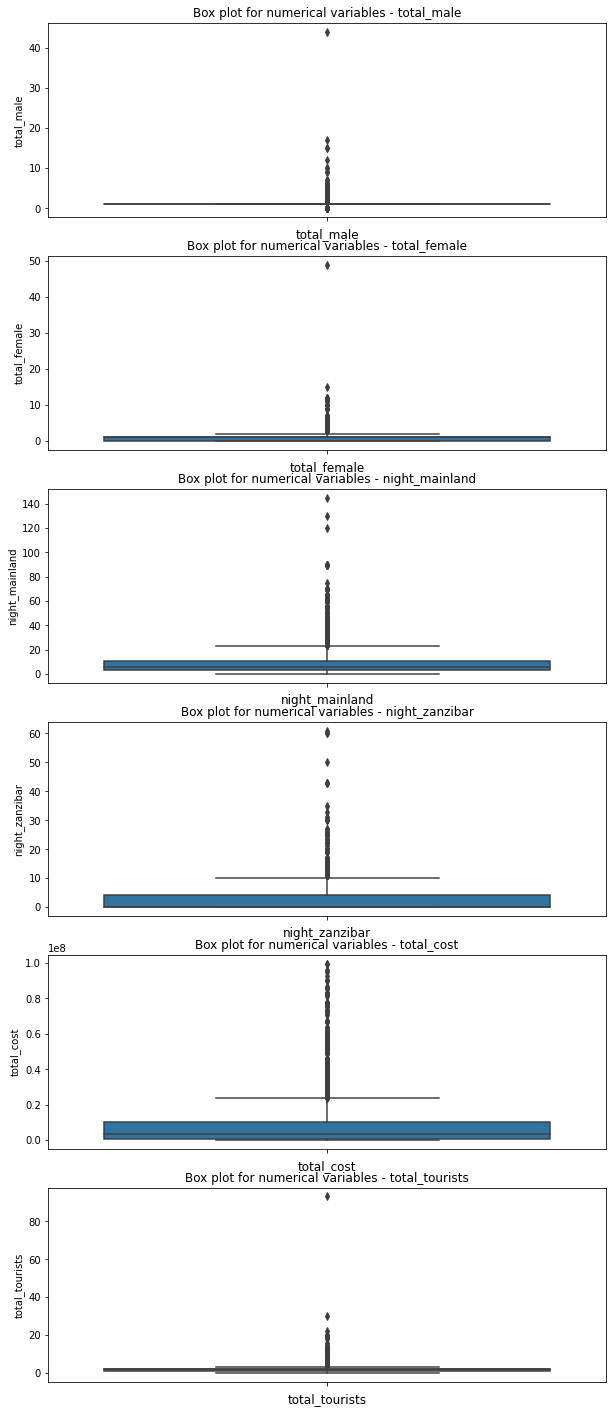

In [ ]:
# Checking for outliers
col_names= ['total_male','total_female', 'night_mainland', 'night_zanzibar','total_cost', 'total_tourists']

fig, ax = plt.subplots(len(col_names), figsize=(10,25))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=tourism[col_val], ax=ax[i])
    ax[i].set_title('Box plot for numerical variables - {}'.format(col_val), fontsize=12)
    ax[i].set_xlabel(col_val, fontsize=12)

plt.show()

**There is presence of outliers in all numerical columns. However, we will not drop them as they are true values and not due to bad entry or anomalies.**

## 4. Exploratory Data Analysis


### 4.1  Univariate Analysis

In [ ]:
# Frequency Table of the Number of Age Groups
tourism.age_group.value_counts()

25-44    2487
45-64    1391
1-24      624
65+       307
Name: age_group, dtype: int64

**Most tourists are between 25 and 44 years**

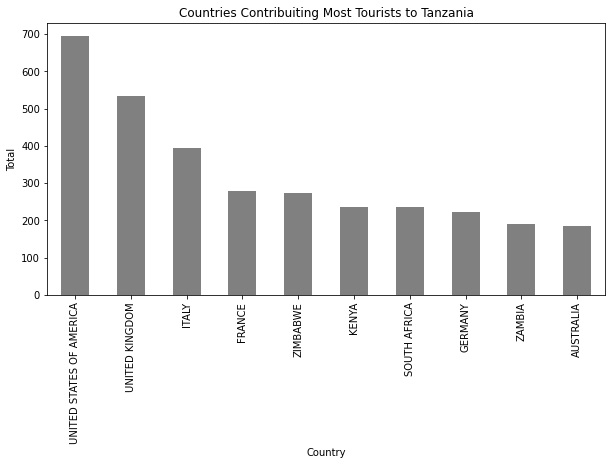

In [ ]:
#Bar graph of countries contributing the most tourists to Tanzania
plt.figure(figsize = (10,5))
tourism.groupby('country').size().sort_values(ascending = False)[:10].plot(kind='bar', color='grey')
plt.title('Countries Contribuiting Most Tourists to Tanzania')
plt.ylabel('Total')
plt.xlabel('Country')
plt.show()


**Most tourists are from the United States of America**

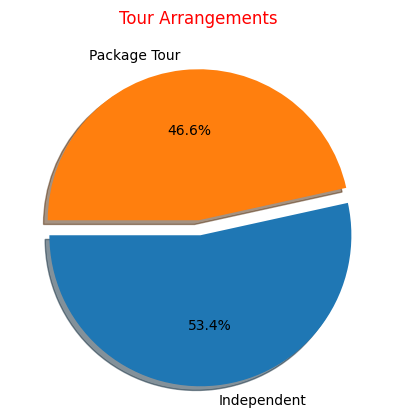

In [ ]:
# Pie chart showing the most popular tour arrangements
accounts = tourism['tour_arrangement'].value_counts()
labels = accounts.index
values = accounts.values

plt.figure(figsize=(5,5), dpi=100)
plt.pie(values, labels = labels, autopct='%1.1f%%', explode = (0.1,0), shadow=True, startangle=180)
plt.title('Tour Arrangements', color='Red')
plt.show()

**Less tourists use package tours. However, there is no big difference between the two values.**

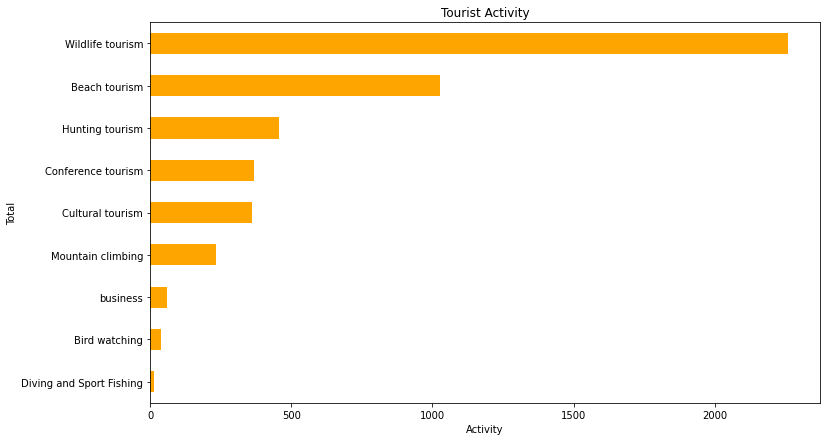

In [ ]:
# Bar chart showing the main activities that tourists partake in while in Tanzania
plt.figure(figsize = (12,7))
tourism.groupby('main_activity').size().sort_values(ascending = True).plot(kind='barh', color='orange')
plt.title('Tourist Activity')
plt.ylabel('Total')
plt.xlabel('Activity')
plt.show()

**Wildlife tourism is the most popular tourist activity**

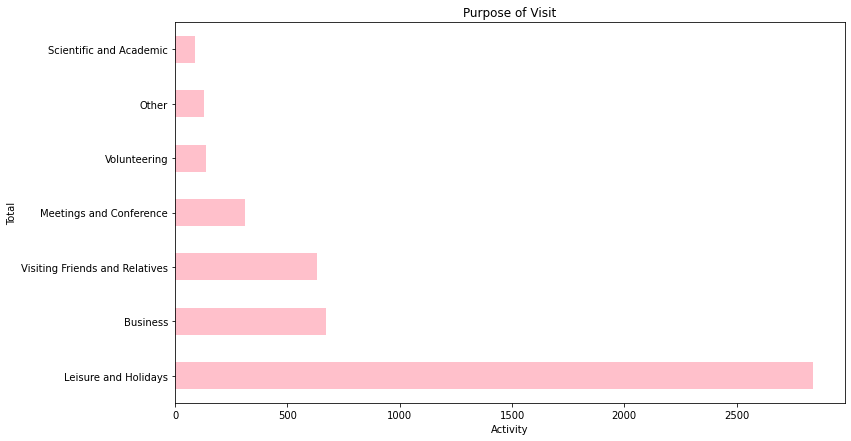

In [ ]:
#Bar chart showing the main purpose of visiting Tanzania by tourists
tourism.sort_values(by='purpose')
plt.figure(figsize=(12,7))
tourism.groupby('purpose').size().sort_values(ascending = False).plot(kind='barh', color='pink')
plt.title('Purpose of Visit')
plt.ylabel('Total')
plt.xlabel('Activity')
plt.show()

**Most tourists visit for leisure and holidays**

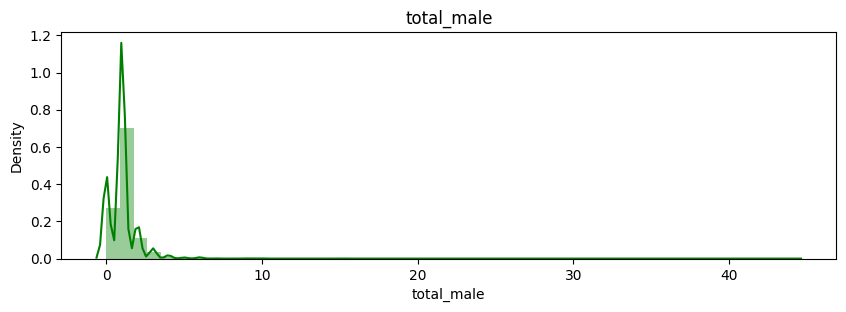

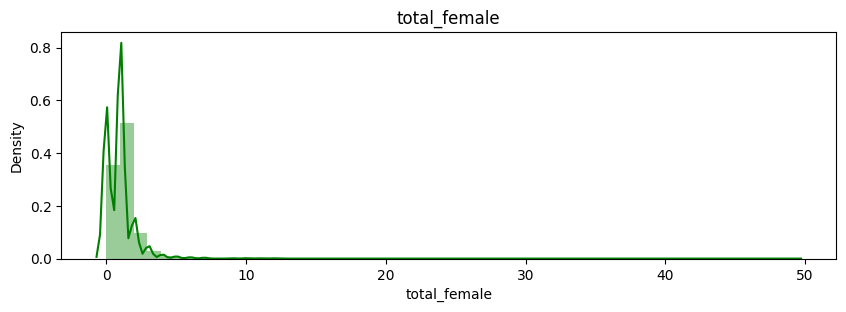

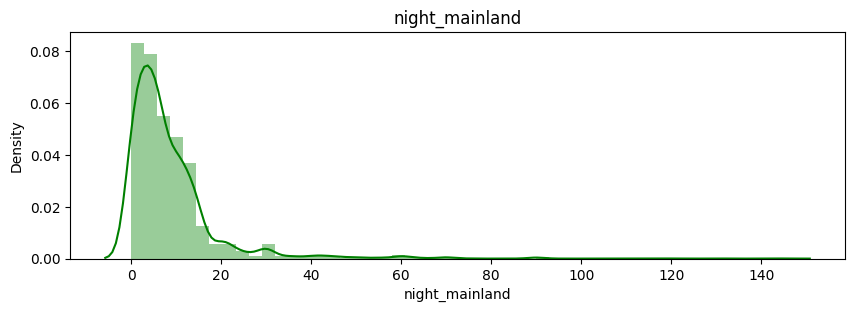

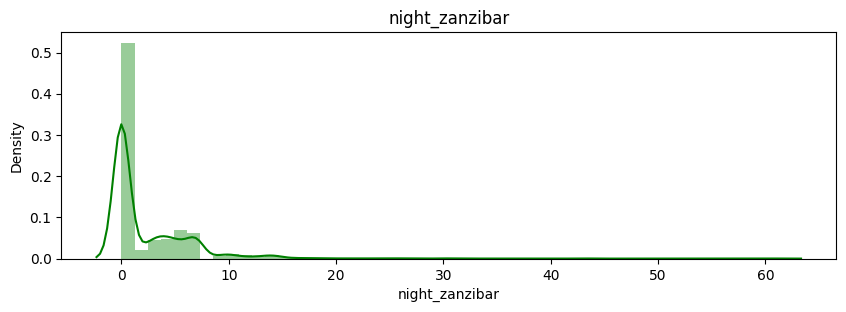

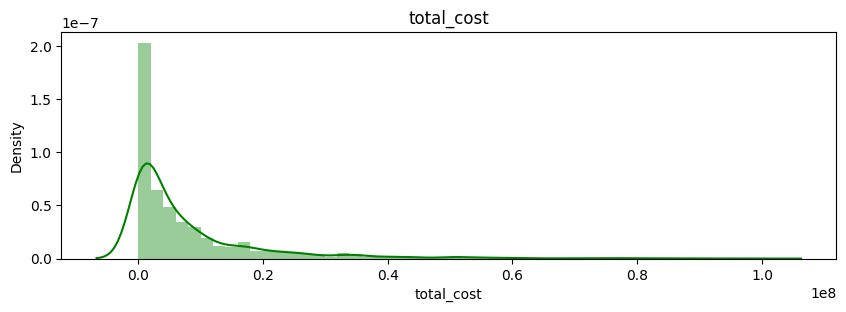

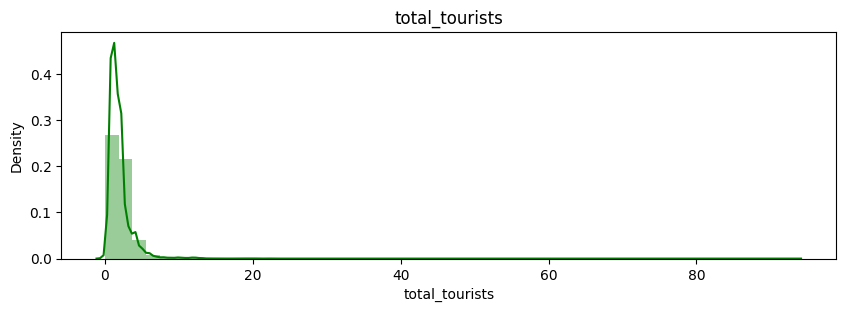

In [ ]:
#Histogram of the numerical values
cols = ['total_male','total_female', 'night_mainland', 'night_zanzibar', 'total_cost', 'total_tourists']

for i in cols:
  plt.figure(figsize = (10,3), dpi=100)
  sns.distplot(tourism[i], kde = True, color = 'green')
  plt.title(i, color = 'Black')
  plt.show()

**From the histograms, we can tell that the data is positively skewed/skewed to the right.**

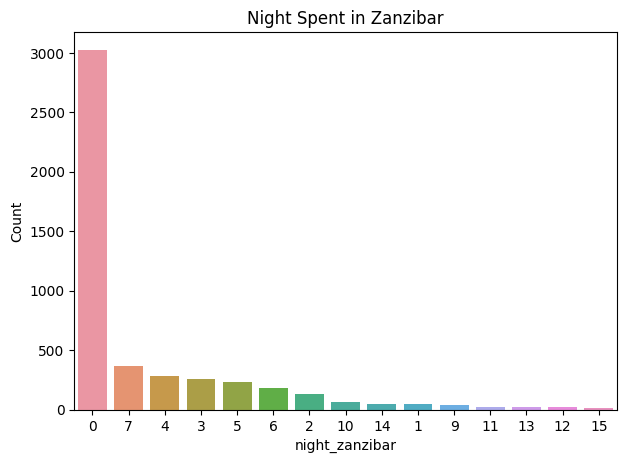

In [ ]:
#Countplot showing the number of nights spent in Zanzibar
plt.figure(figsize = (7,5), dpi=100)
sns.countplot(tourism['night_zanzibar'], order=tourism['night_zanzibar'].value_counts().index[:15])
plt.title('Night Spent in Zanzibar')
plt.ylabel("Count")
plt.show()

**Most people didn't spend a single night in Zanzibar. However, the next most stayed 7 nights and then 4 nights which is a good number.**

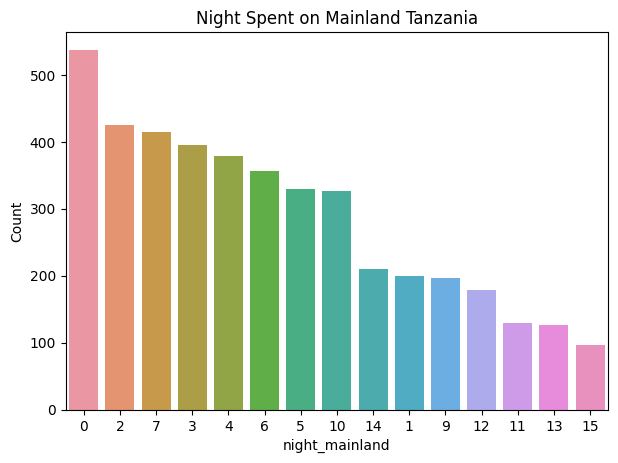

In [ ]:
#Countplot showing the number of nights spent in Mainland Tanzania
plt.figure(figsize = (7, 5), dpi=100)
sns.countplot(tourism['night_mainland'], order=tourism['night_mainland'].value_counts().index[:15])
plt.title('Night Spent on Mainland Tanzania')
plt.ylabel('Count')
plt.show()

**Most people didn't spend their nights in Mainland Tanzania. Other people spent 2 or 7 nights most.**

In [ ]:
# We will define the numerical columns as cols to make the work easier
cols = ['total_male','total_female', 'night_mainland', 'night_zanzibar', 'total_cost', 'total_tourists']
# Finding the mean of numerical columns
tourism[cols].mean()

total_male        1.008526e+00
total_female      9.261801e-01
night_mainland    8.488043e+00
night_zanzibar    2.304429e+00
total_cost        8.114389e+06
total_tourists    1.934706e+00
dtype: float64

In [ ]:
# Finding the mode of numerical columns
tourism[cols].mode()

,total_male,total_female,night_mainland,night_zanzibar,total_cost,total_tourists
0,1.0,1.0,0,0,1657500.0,1.0


In [ ]:
# Finding the median of numerical columns
tourism[cols].median()

total_male              1.0
total_female            1.0
night_mainland          6.0
night_zanzibar          0.0
total_cost        3397875.0
total_tourists          2.0
dtype: float64

In [ ]:
# Finding the quantiles of numerical columns
tourism[cols].quantile([0.25, 0.75])

,total_male,total_female,night_mainland,night_zanzibar,total_cost,total_tourists
0.25,1.0,0.0,3.0,0.0,812175.0,1.0
0.75,1.0,1.0,11.0,4.0,9945000.0,2.0


In [ ]:
# Standard Deviation of numerical columns
tourism[cols].std()

total_male        1.138738e+00
total_female      1.288048e+00
night_mainland    1.042762e+01
night_zanzibar    4.227080e+00
total_cost        1.222490e+07
total_tourists    2.077707e+00
dtype: float64

**All numerical values apart from total costs didn't have a large standard deviation.**

In [ ]:
# Variance of numerical columns
tourism[cols].var()

total_male        1.296724e+00
total_female      1.659067e+00
night_mainland    1.087353e+02
night_zanzibar    1.786820e+01
total_cost        1.494483e+14
total_tourists    4.316867e+00
dtype: float64

In [ ]:
# Skewness of numerical columns
tourism[cols].skew()

total_male        13.802443
total_female      13.035894
night_mainland     4.026044
night_zanzibar     4.226719
total_cost         2.967848
total_tourists    19.852056
dtype: float64

**Our data is positively skewed**

In [ ]:
# The Kurtosis of numerical columns
tourism[cols].kurt()

total_male        445.123696
total_female      416.104746
night_mainland     26.392706
night_zanzibar     35.987216
total_cost         11.431051
total_tourists    783.258351
dtype: float64

**The total male and total female columns have extreme values.**

### 4.2 Bivariate Analysis

<Figure size 700x500 with 0 Axes>

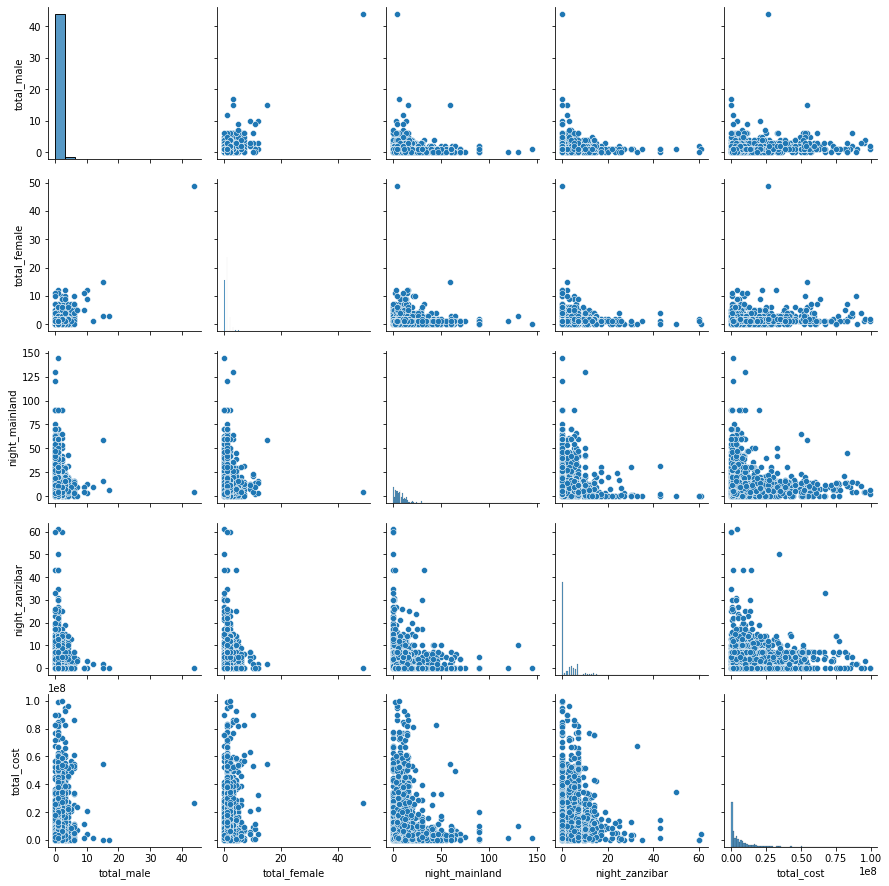

In [ ]:
#Plotting a pairplot of all the numerical values
plt.figure(figsize = (7, 5), dpi=100)
y =['total_male','total_female', 'night_mainland', 'night_zanzibar', 'total_cost']
sns.pairplot(tourism[y])

**There is no relationship between the numerical columns**

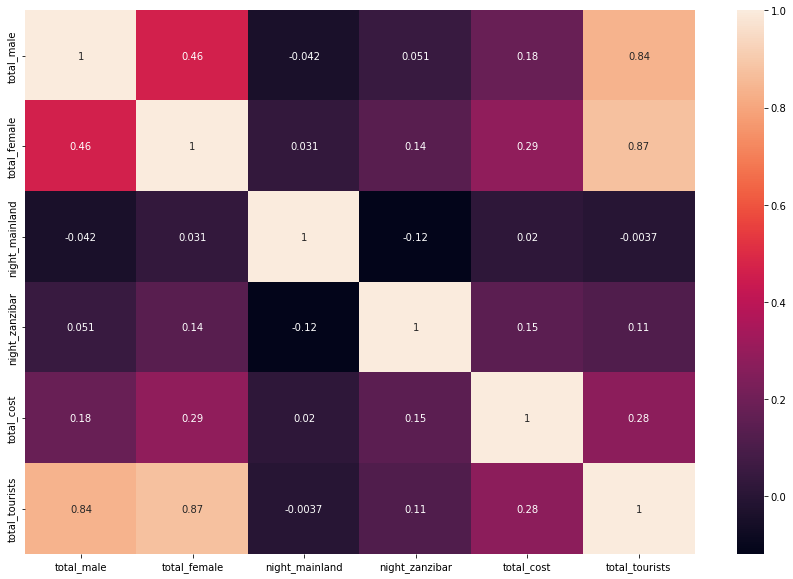

In [ ]:
#A correlation matrix of the numerical values
corr = tourism[cols].corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr, annot=True)

**Correlation coefficients between -.20 and .20 are generally considered weak, 
between .20 and .50 (positive or negative) are considered moderate,and above .50 (positive or negative) are considered strong. Since the correlation coefficent of total male and total female is 0.46, this means that total male and total female are moderately correlated. There is a strong correlation between the total tourists and the total number of males or females. The rest of the values have a weak or no correlation at all.**

### 4.3 Multivariate Analysis

In [ ]:
#Importing the libraries needed for multivariate analysis
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
#These are the columns that we will use for the analysis
colz = ['country', 'age_group', 'main_activity', 'purpose', 'tour_arrangement', 'package_transport_int', 'package_accomodation', 'package_food', 'package_transport_tz', 'package_sightseeing', 'package_guided_tour', 'package_insurance', 'payment_mode']

In [ ]:
#Encoding the multiple columns at once
df_tour = tourism[colz].apply(LabelEncoder().fit_transform)
df_tour.head()

,country,age_group,main_activity,purpose,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,payment_mode
0,89,2,7,1,0,0,0,0,0,0,0,0,0
1,99,1,3,1,0,0,0,0,0,0,0,0,0
2,99,1,3,5,0,0,0,0,0,0,0,0,0
3,99,1,7,1,1,0,1,1,1,1,1,0,0
4,13,0,7,1,0,0,0,0,0,0,0,0,0


In [ ]:
#Step 1: Seperating our target label (diagnosis) from other features
X = df_tour.drop(['main_activity'], axis = 1)
Y = df_tour['main_activity']

In [ ]:
#Step 2: Confirming the features don't contain the target variable
X[1:12]

,country,age_group,purpose,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,payment_mode
1,99,1,1,0,0,0,0,0,0,0,0,0
2,99,1,5,0,0,0,0,0,0,0,0,0
3,99,1,1,1,0,1,1,1,1,1,0,0
4,13,0,1,0,0,0,0,0,0,0,0,0
5,99,1,1,1,0,0,0,0,1,1,0,0
6,83,2,0,0,0,0,0,0,0,0,0,0
7,100,2,1,1,1,1,1,1,1,1,1,0
8,67,1,1,0,0,0,0,0,0,0,0,0
9,35,1,0,0,0,0,0,0,0,0,0,1
10,7,1,1,0,0,0,0,0,0,0,0,0


In [ ]:
#Checking the unique values of the target variable
Y.unique()

array([7, 3, 6, 0, 2, 5, 1, 8, 4])

In [ ]:
#Step 3: Create an instance of LDA and train the model
lda = LDA(solver='eigen',shrinkage='auto')
X_lda = lda.fit(X,Y)
lda_feat = X_lda.transform(X)

#Display the coefficients of the reducted colums
X_lda.coef_

array([[ 0.06104833,  1.94158709,  1.06401472,  1.68247543,  0.95022996,
         1.36630962,  0.26293181, -0.20940571, -1.88541607, -0.37443648,
         0.59751058,  0.6907089 ],
       [ 0.0651773 ,  2.5259854 ,  0.9676206 ,  2.35816463,  0.0567845 ,
         0.309178  , -0.62038235, -0.60042727, -1.11709336,  0.46948278,
        -0.3251101 ,  0.43961063],
       [ 0.06781713,  1.4954067 ,  0.89058637,  2.27668935, -0.12300594,
         1.75436474, -0.64047641,  0.42267719, -0.41138978,  1.41936934,
        -0.89137078,  0.50072165],
       [ 0.05746124,  1.76685618,  1.54847008,  1.34178407,  0.06906728,
         0.84962243, -0.03908763,  0.3867877 , -1.03613918,  0.06774695,
         0.11217658,  0.64244144],
       [ 0.06819558,  2.95041083,  0.66902499,  1.44747677,  0.67254643,
         2.035649  , -0.95606772, -1.81296646, -0.02026287,  0.84720469,
        -0.60699623,  2.39856981],
       [ 0.06938909,  2.19492962,  1.88483613,  1.64736572, -0.09396598,
         1.1508885 , -

In [ ]:
#Since the coefficients are in array, we need to create a dataframe so that we can extract the name of the columns
lda_df = pd.DataFrame(index=X.columns.values, data=X_lda.coef_[0].T)
lda_df.sort_values(0, ascending=False)

,0
age_group,1.941587
tour_arrangement,1.682475
package_accomodation,1.366310
purpose,1.064015
package_transport_int,0.950230
payment_mode,0.690709
package_insurance,0.597511
package_food,0.262932
country,0.061048
package_transport_tz,-0.209406


**They are dependent on each other.**

**The factors that determine most the main activity that tourists partake in Tanzania are age group, tour arrangement and package accomodation. Purpose, payment mode, package transport, package insurance, package food, and country weakly determine. The rest don't.**

## 5. Normality Test 

In [ ]:
# testing for normality
from scipy.stats import shapiro 
for i in cols:
  stat, p = shapiro(tourism[i])
  print('Statistics=%.3f, p=%.3f' % (stat, p))
  # interpreting
  alpha = 0.05
  if p > alpha:
    print('Data looks Gaussian for', i)
  else:
    print('Data does not look Gaussian for', i)

Statistics=0.479, p=0.000
Data does not look Gaussian for total_male
Statistics=0.497, p=0.000
Data does not look Gaussian for total_female
Statistics=0.653, p=0.000
Data does not look Gaussian for night_mainland
Statistics=0.583, p=0.000
Data does not look Gaussian for night_zanzibar
Statistics=0.654, p=0.000
Data does not look Gaussian for total_cost
Statistics=0.374, p=0.000
Data does not look Gaussian for total_tourists


**All the data doesn't look Gaussian.**

##6. Sampling and Hypothesis Testing

**First we define the null and alternate hypothesis.**


*   **Null Hypothesis - The average number of tourists who visit Tanzania for beach tourism are less or equal to the number of tourists who visit Tanzania to see wildlife.**
*   **Alternative hypothesis - The average number of tourists who visit Tanzania for beach tourism is greater than the number of tourists who visit Tanzania to see wildlife.**

**We will use a significance level of 0.05.**
**The sampling method will be stratified random sampling taking samples randomly from two populations, stratifying by age group.**

In [ ]:
#Creating a column that sums the number of total tourists
tourism['total_tourists'] = tourism['total_female'] + tourism['total_male']
tourism.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,total_cost,total_tourists
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,Independent,No,No,No,No,No,No,No,13,0,Cash,No,674602.5,2.0
1,tour_10,UNITED KINGDOM,25-44,DNS,1.0,0.0,Leisure and Holidays,Cultural tourism,Independent,No,No,No,No,No,No,No,14,7,Cash,Yes,3214906.5,1.0
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,Independent,No,No,No,No,No,No,No,1,31,Cash,No,3315000.0,1.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,Package Tour,No,Yes,Yes,Yes,Yes,Yes,No,11,0,Cash,Yes,7790250.0,2.0
4,tour_1004,CHINA,1-24,DNS,1.0,0.0,Leisure and Holidays,Wildlife tourism,Independent,No,No,No,No,No,No,No,7,4,Cash,Yes,1657500.0,1.0


In [ ]:
#Creating a sub-dataset that only has beach tourism as the main activity
beach = tourism[tourism['main_activity'] == 'Beach tourism']
beach.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,total_cost,total_tourists
11,tour_1013,CANADA,45-64,Children,2.0,0.0,Leisure and Holidays,Beach tourism,Independent,No,No,No,No,No,No,No,30,0,Cash,No,8121750.0,2.0
14,tour_1018,MOZAMBIQUE,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Beach tourism,Independent,No,No,No,No,No,No,No,2,0,Cash,Yes,497250.0,1.0
15,tour_102,RWANDA,65+,Alone,1.0,0.0,Leisure and Holidays,Beach tourism,Independent,No,No,No,No,No,No,No,0,2,Cash,Yes,331500.0,1.0
23,tour_103,ALGERIA,25-44,Spouse,1.0,1.0,Leisure and Holidays,Beach tourism,Independent,No,No,No,No,No,No,No,0,11,Cash,Yes,3734347.5,2.0
25,tour_1032,DENMARK,1-24,Friends/Relatives,2.0,2.0,Scientific and Academic,Beach tourism,Independent,No,No,No,No,No,No,No,15,7,Cash,Yes,400000.0,4.0


In [ ]:
#Creating a sub-dataset that only has beach tourism as the main activity
wildlife = tourism[tourism['main_activity'] == 'Wildlife tourism']
wildlife.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,total_cost,total_tourists
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,Independent,No,No,No,No,No,No,No,13,0,Cash,No,674602.5,2.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,Package Tour,No,Yes,Yes,Yes,Yes,Yes,No,11,0,Cash,Yes,7790250.0,2.0
4,tour_1004,CHINA,1-24,DNS,1.0,0.0,Leisure and Holidays,Wildlife tourism,Independent,No,No,No,No,No,No,No,7,4,Cash,Yes,1657500.0,1.0
5,tour_1005,UNITED KINGDOM,25-44,DNS,0.0,1.0,Leisure and Holidays,Wildlife tourism,Package Tour,No,No,No,No,Yes,Yes,No,9,3,Cash,Yes,120950.0,1.0
7,tour_1008,UNITED STATES OF AMERICA,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,Yes,10,3,Cash,Yes,3480750.0,2.0


In [ ]:
# Non stratified sample for the beach dataset
wildlife_non_strat_output = wildlife.sample(frac=0.1) 

# check the proportion of the non_stratified sample
print(wildlife_non_strat_output['age_group'].value_counts())

25-44    112
45-64     70
1-24      22
65+       22
Name: age_group, dtype: int64


In [ ]:
# Stratified sample for the beach dataset
wildlife_strat_output = wildlife.groupby('age_group', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))

# proportion of the non_stratified sample
print(wildlife_strat_output['age_group'].value_counts())

# Check the stratified output
wildlife_strat_output

25-44    105
45-64     77
65+       24
1-24      20
Name: age_group, dtype: int64


,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,total_cost,total_tourists
2853,tour_4476,SWEDEN,1-24,Friends/Relatives,3.0,1.0,Leisure and Holidays,Wildlife tourism,Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,No,7,7,Cash,Yes,215000.0,4.0
3906,tour_5741,BELGIUM,1-24,Alone,0.0,1.0,Volunteering,Wildlife tourism,Package Tour,No,Yes,Yes,Yes,Yes,Yes,Yes,11,3,Cash,Yes,2900625.0,1.0
337,tour_1412,ITALY,1-24,Friends/Relatives,1.0,3.0,Leisure and Holidays,Wildlife tourism,Independent,No,No,No,No,No,No,No,3,0,Cash,No,4538660.0,4.0
3494,tour_5230,ITALY,1-24,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,Package Tour,Yes,Yes,Yes,Yes,No,No,No,0,7,Cash,Yes,6464250.0,2.0
900,tour_2103,AUSTRALIA,1-24,Alone,1.0,0.0,Leisure and Holidays,Wildlife tourism,Package Tour,No,Yes,Yes,Yes,Yes,Yes,Yes,7,4,Cash,Yes,7873125.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,tour_2220,UNITED STATES OF AMERICA,65+,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,Yes,3,0,Credit Card,Yes,17901000.0,2.0
1994,tour_3420,UNITED STATES OF AMERICA,65+,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,Package Tour,No,Yes,Yes,Yes,Yes,Yes,No,4,0,Cash,Yes,14983800.0,2.0
1608,tour_2975,UNITED STATES OF AMERICA,65+,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,Yes,7,0,Credit Card,Yes,50056500.0,2.0
821,tour_2008,KENYA,65+,Alone,1.0,0.0,Business,Wildlife tourism,Independent,No,No,No,No,No,No,No,4,0,Cash,No,900000.0,1.0


In [ ]:
# Non stratified sample for the beach dataset
beach_non_strat_output = beach.sample(frac=0.1) 

# check the proportion of the non_stratified sample
print(beach_non_strat_output['age_group'].value_counts())

25-44    68
45-64    23
1-24     11
Name: age_group, dtype: int64


In [ ]:
# Stratified sample for the beach dataset
beach_strat_output = beach.groupby('age_group', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))

# proportion of the non_stratified sample
print(beach_strat_output['age_group'].value_counts())

# Check the stratified output
beach_strat_output

25-44    62
45-64    24
1-24     14
65+       2
Name: age_group, dtype: int64


,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,total_cost,total_tourists
2149,tour_3611,UNITED STATES OF AMERICA,1-24,Alone,1.0,0.0,Leisure and Holidays,Beach tourism,Independent,No,No,No,No,No,No,No,30,0,Cash,Yes,2353650.0,1.0
1129,tour_2386,UNITED STATES OF AMERICA,1-24,DNS,0.0,1.0,Leisure and Holidays,Beach tourism,Package Tour,No,Yes,Yes,Yes,Yes,No,No,4,0,Cash,Yes,3978000.0,1.0
2002,tour_3432,UNITED STATES OF AMERICA,1-24,Friends/Relatives,1.0,1.0,Visiting Friends and Relatives,Beach tourism,Independent,No,No,No,No,No,No,No,5,1,Cash,Yes,885038.7,2.0
4776,tour_956,RWANDA,1-24,DNS,1.0,0.0,Visiting Friends and Relatives,Beach tourism,Independent,No,No,No,No,No,No,No,3,0,Cash,Yes,165750.0,1.0
3702,tour_5487,UNITED KINGDOM,1-24,Friends/Relatives,4.0,0.0,Leisure and Holidays,Beach tourism,Independent,No,No,No,No,No,No,No,0,5,Cash,Yes,4309500.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3781,tour_5587,IRELAND,45-64,Friends/Relatives,4.0,1.0,Visiting Friends and Relatives,Beach tourism,Independent,No,No,No,No,No,No,No,2,43,Cash,No,14225250.0,5.0
3504,tour_5244,ZIMBABWE,45-64,DNS,0.0,1.0,Leisure and Holidays,Beach tourism,Independent,No,No,No,No,No,No,No,2,0,Cash,Yes,497400.0,1.0
3034,tour_4680,ITALY,45-64,Spouse and Children,3.0,1.0,Leisure and Holidays,Beach tourism,Package Tour,Yes,Yes,Yes,Yes,No,Yes,Yes,0,15,Cash,Yes,12431250.0,4.0
221,tour_1275,ITALY,65+,Friends/Relatives,2.0,5.0,Leisure and Holidays,Beach tourism,Package Tour,Yes,Yes,No,Yes,No,No,No,12,4,Cash,Yes,9304253.0,7.0


In [ ]:
#Finding the variance of the wildlife dataset
var_wild = wildlife['total_tourists'].var()
var_wild

6.5094837655576105

In [ ]:
#Finding the variance of the beach dataset
var_beach = beach['total_tourists'].var()
var_beach

2.26498094512198

In [ ]:
#Looking at the mean and standard of error of the wildlife sample
mean_wild = round(wildlife_strat_output['total_tourists'].mean(), 3)
print("The mean of the wildlife sample is ", mean_wild)
sd_wild = var_wild/math.sqrt(226)
print("The standard of error of the wildlife sample is ", sd_wild)

The mean of the wildlife sample is  1.903
The standard of error of the wildlife sample is  0.4330044191054623


In [ ]:
#Looking at the mean and standard of error of the beach sample
mean_beach = round(beach_strat_output['total_tourists'].mean(), 3)
print("The mean of the beach sample is ", mean_beach)
sd_beach = var_beach/math.sqrt(102)
print("The standard of error of the beach sample is ", sd_beach)

The mean of the beach sample is  2.255
The standard of error of the beach sample is  0.2242665317701514


In [ ]:
#The standard of error of both samples
s = sd_beach + sd_wild
print(s)

0.6572709508756137


In [ ]:
#The zscore of the samples
zscore = (mean_wild - mean_beach)/s
zscore


-0.5355477821301351

In [ ]:
#Getting the p-value and testing the hypothesis
from scipy import stats
from scipy.stats import norm
alpha = 0.05
prob = stats.norm.cdf(zscore)
print(round(prob, 3))
if(prob <  alpha):
  print("We reject the null hypothesis")
else:
  print("We fail to reject the null hypothesis")

0.296
We fail to reject the null hypothesis


**The p-value is greater than the level of significance. Therefore, we fail to reject the null hypothesis. The number of tourist who visit Tanzania for beach tourism are less or equal to the number of tourist who visit Tanzania for wildlife tourism**


# 7. Recommendations

**From our findings, we made the following reccomendations**


*   Introduce attractive offers and discounts
*   Customize advertisements on social media
*   Create travel technology
*   Introduce a free travel visa
*   Increase activities that attract people of ages 25 - 55
*   Introduce packages that suit this age group travel needs

